Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions 

Note -

1. Draw plots to demonstrate the analysis for the following questions for better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the Earth meteorites that fell before the year 2000

● Get all the earth meteorites co-ordinates who fell before the year 1970

● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

In [1]:
#importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# data ingestion
data= pd.read_csv("Meteorite.csv")

In [3]:
data.head()

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         948 non-null    object 
 1   id           948 non-null    int64  
 2   nametype     948 non-null    object 
 3   recclass     948 non-null    object 
 4   mass         948 non-null    float64
 5   year         948 non-null    object 
 6   reclat       948 non-null    float64
 7   reclong      948 non-null    float64
 8   coordinates  948 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.8+ KB


In [5]:
# Converting years to datetime format
data['year'] = pd.to_datetime(data['year'], errors='coerce')

#Filtering all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = data[(data['reclat'].notnull()) & (data['year'].dt.year < 2000)]
earth_meteorites_before_2000

,name,id,nametype,recclass,mass,year,reclat,reclong,coordinates
0,Aachen,1,Valid,L5,21.0,1880-01-01,50.77500,6.08333,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,1951-01-01,56.18333,10.23333,"[10.23333, 56.18333]"
2,Abee,6,Valid,EH4,107000.0,1952-01-01,54.21667,-113.00000,"[-113, 54.21667]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,1976-01-01,16.88333,-99.90000,"[-99.9, 16.88333]"
4,Achiras,370,Valid,L6,780.0,1902-01-01,-33.16667,-64.95000,"[-64.95, -33.16667]"
...,...,...,...,...,...,...,...,...,...
942,Timochin,24004,Valid,H5,65500.0,1807-01-01,54.50000,35.20000,"[35.2, 54.5]"
943,Tirupati,24009,Valid,H6,230.0,1934-01-01,13.63333,79.41667,"[79.41667, 13.63333]"
945,Tjabe,24011,Valid,H6,20000.0,1869-01-01,-7.08333,111.53333,"[111.53333, -7.08333]"
946,Tjerebon,24012,Valid,L5,16500.0,1922-01-01,-6.66667,106.58333,"[106.58333, -6.66667]"


In [6]:
#Converting the years to centuries for better visualization. 
data['century'] = (data['year'].dt.year // 100) + 1
meteorites = data[data['year'].dt.year < 2000]
meteorites_per_century = meteorites.groupby('century').size()


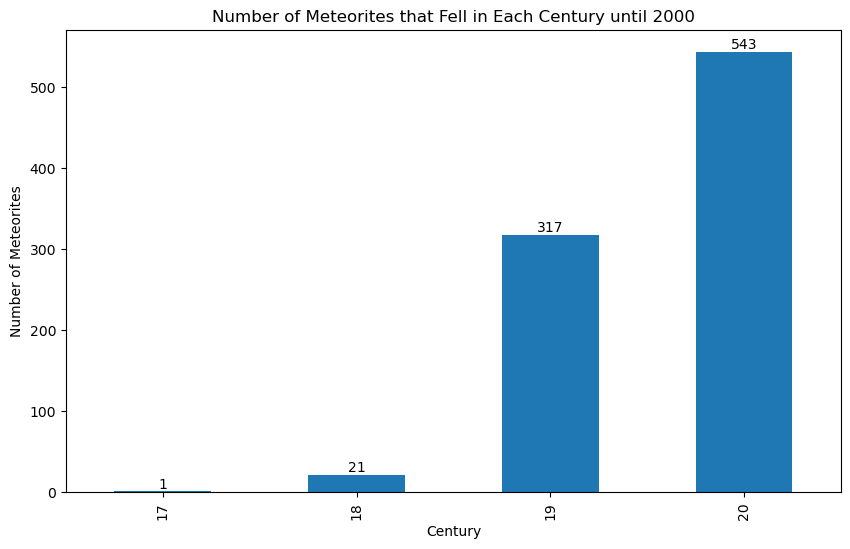

In [7]:
# Plotting a graph between ceturies and count of meteorites
ax=meteorites_per_century.plot(kind='bar', figsize=(10, 6))

# Adding data labels
for i, v in enumerate(meteorites_per_century):
    ax.text(i, v, str(v), ha='center', va='bottom')
    
plt.xlabel('Century')
plt.ylabel('Number of Meteorites')
plt.title('Number of Meteorites that Fell in Each Century until 2000')
plt.show()


Insight:

A total of 882 meteorites fell before the year 2000.
    
    1 meteorite fell in the 17th Century.
    21 meteorites fell during the 18th Century.
    317 meteorites fell during the 19th Century.
    543 meteorites fell during the 20th Century.

In [8]:
# Filtering all the earth meteorites co-ordinates who fell before the year 1970
earth_meteorites_before_1970 = data[(data['year'].dt.year < 1970)][['coordinates']]

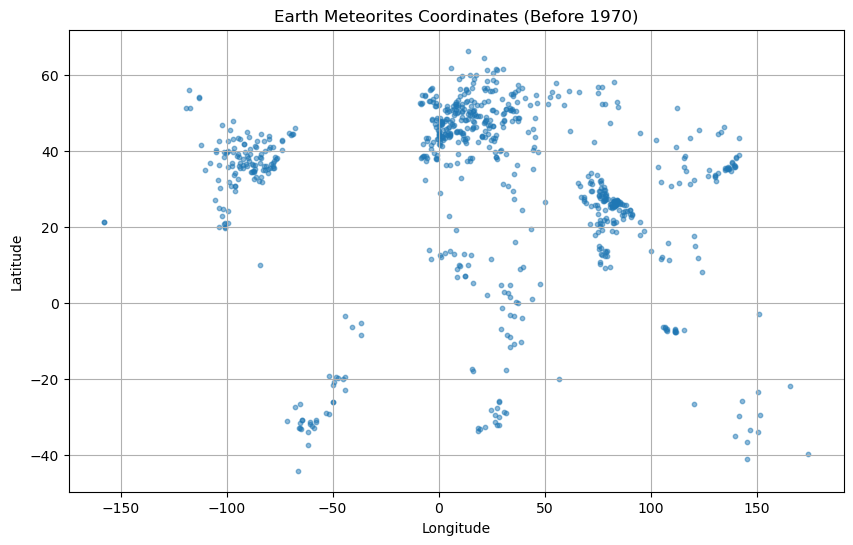

In [9]:
earth_meteorites_before_1970 = meteorites[(meteorites['reclat'].notnull()) & (meteorites['reclong'].notnull()) & (meteorites['year'].dt.year < 1970)]

# Plot the latitude and longitude coordinates
plt.figure(figsize=(10, 6))
plt.scatter(earth_meteorites_before_1970['reclong'], earth_meteorites_before_1970['reclat'], s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites Coordinates (Before 1970)')
plt.grid(True)
plt.show()

Insight:

Most number of meteorites fell where both latitude and longitude are positive as compared to the rest of coordinates.


In [10]:
#Filtering all meteorites whose mass is more than 10000kg
earth_meteorites_large_mass = data[data['mass'] > 10000][['name', 'mass']]


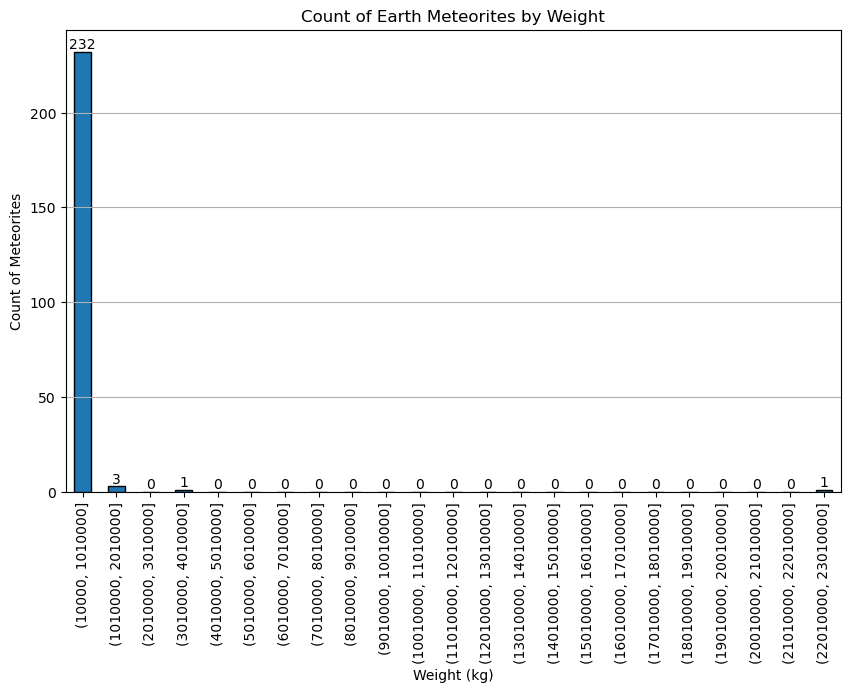

In [11]:
# Group meteorites by weight ranges and calculate the count of meteorites in each range
weight_ranges = pd.cut(earth_meteorites_large_mass['mass'], bins=range(10000, int(earth_meteorites_large_mass['mass'].max()) +1000001, 1000000))
meteorite_counts = earth_meteorites_large_mass.groupby(weight_ranges)['name'].count()

# Plot the data using a bar plot
plt.figure(figsize=(10, 6))
ax=meteorite_counts.plot(kind='bar', edgecolor='black')
# Add data labels to the bars
for i, v in enumerate(meteorite_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')
plt.xlabel('Weight (kg)')
plt.ylabel('Count of Meteorites')
plt.title('Count of Earth Meteorites by Weight')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


Insight:

A total of 237 Meteorites are having weight above 10000 Kg.

    232 Meterorites are having weights in the range of 10000 kg to 1010000 Kg
    5 Meterorites are having weights above the range of 1010000 Kg